# Modelagem para prever o risco financeiro

Esse projeto é baseado no dataset disponível no Kaggle: https://www.kaggle.com/datasets/preethamgouda/financial-risk/data

## Importando dados

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("/content/financial_risk_assessment.csv")

## Entendendo os dados

In [9]:
data.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,43.452667,14.910732,18.000000,31.000000,43.000000,56.000000,69.00000
Income,12750.0,69933.398510,29163.626207,20005.000000,44281.500000,69773.000000,95922.750000,119997.00000
Credit Score,12750.0,699.109098,57.229465,600.000000,650.000000,699.000000,748.000000,799.00000
Loan Amount,12750.0,27450.010902,12949.940135,5000.000000,16352.500000,27544.000000,38547.500000,49998.00000
Years at Current Job,15000.0,9.476267,5.769707,0.000000,4.000000,9.000000,15.000000,19.00000
Debt-to-Income Ratio,15000.0,0.350438,0.143919,0.100004,0.227386,0.350754,0.476095,0.59997
Assets Value,12750.0,159741.497176,80298.115832,20055.000000,90635.250000,159362.000000,228707.000000,299999.00000
Number of Dependents,12750.0,2.026510,1.411300,0.000000,1.000000,2.000000,3.000000,4.00000
Previous Defaults,12750.0,1.992471,1.416909,0.000000,1.000000,2.000000,3.000000,4.00000
Marital Status Change,15000.0,0.998467,0.813782,0.000000,0.000000,1.000000,2.000000,2.00000


In [12]:
data.describe(include=[object])

,Gender,Education Level,Marital Status,Loan Purpose,Employment Status,Payment History,City,State,Country,Risk Rating
count,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
unique,3,4,4,4,3,4,10614,59,243,3
top,Non-binary,Bachelor's,Widowed,Personal,Employed,Good,East Michael,CO,Congo,Low
freq,5059,3829,3893,3771,5026,3822,19,282,124,9000


In [13]:
data.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Marital Status,0
Income,2250
Credit Score,2250
Loan Amount,2250
Loan Purpose,0
Employment Status,0
Years at Current Job,0


In [14]:
data.duplicated().sum()

0

## Limpeza dos dados

- Usando o método KNN Imputer para preencher valores NaN

In [15]:
from sklearn.impute import KNNImputer

In [16]:
num_float = data.select_dtypes(include=[np.number, "float"]).columns.to_list()

selected_data = data[num_float]

In [17]:
knn_imputer = KNNImputer()
imputed_data = knn_imputer.fit_transform(selected_data)
imputed_df = pd.DataFrame(imputed_data, columns=num_float)

- Concatenando dataframes tratados

In [18]:
string_info = data[['Gender', 'Education Level', 'Marital Status','Employment Status',
                    'Payment History', 'Loan Purpose', 'Risk Rating']]

In [19]:
complete_df = pd.concat([string_info, imputed_df], axis=1)

## Visualização dos dados

### Histogramas

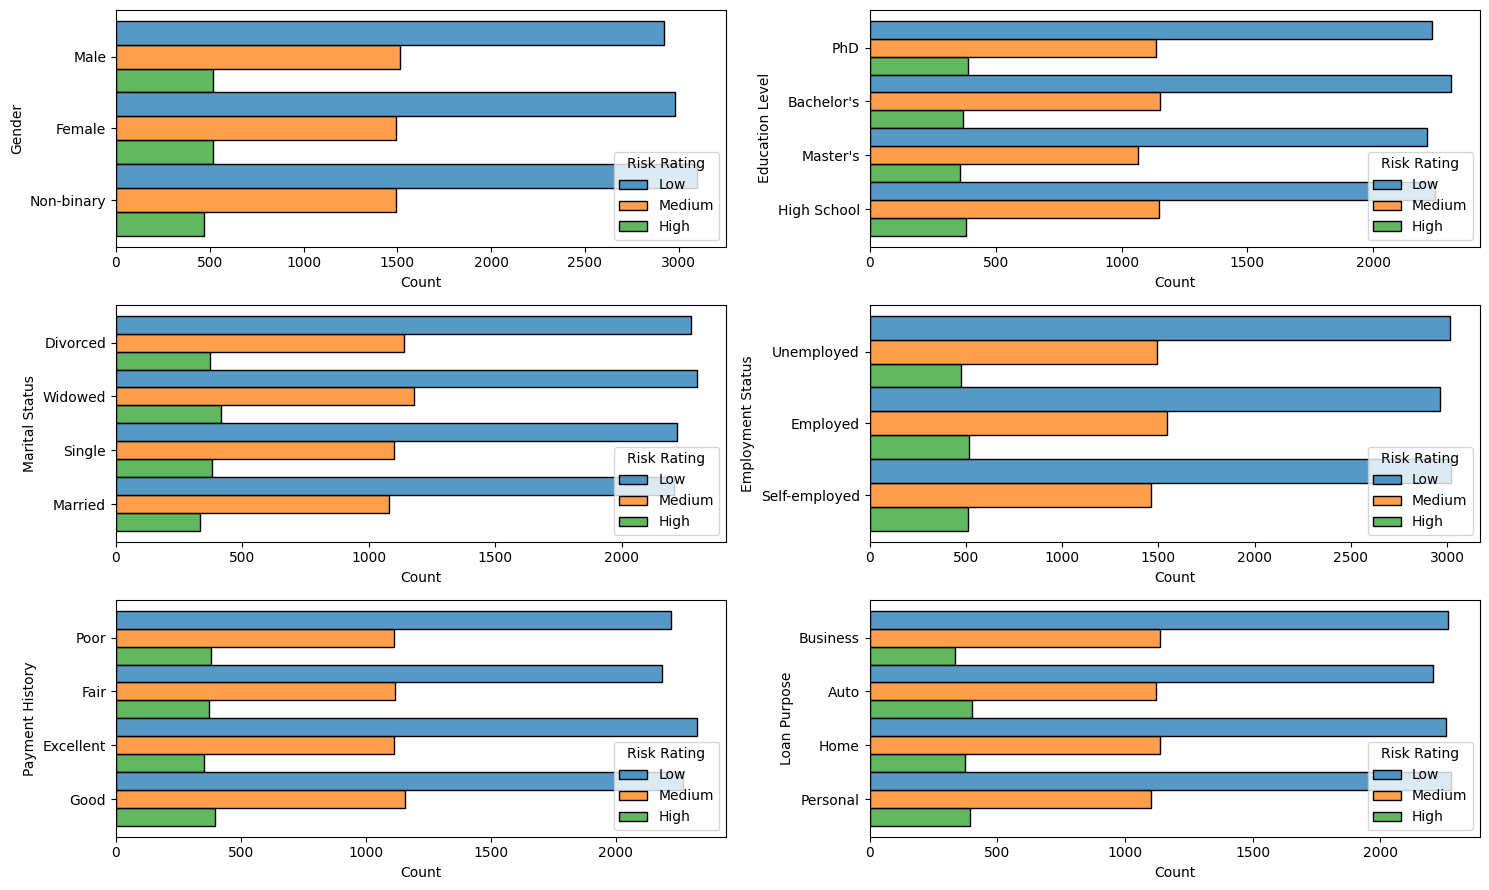

In [20]:
#Criar figura e grade para histogramas
fig, axs = plt.subplots(3, 2, figsize=(15,9))  # 3 linhas, 3 colunas

#Separando nome das colunas:
colunas = ['Gender', 'Education Level', 'Marital Status', 'Employment Status',
       'Payment History', 'Loan Purpose']

axs = axs.flatten()
for ax, col in zip(axs, colunas):
  sns.histplot(ax=ax, data=complete_df, y=col, hue="Risk Rating", kde=False, multiple="dodge")

# Ajuste layout
plt.tight_layout()

# Mostre a figura
plt.show()


**Insights**

1. Os histogramas mostra uma versão geral das variáveis categóricas definidas a partir do *Risk Rating*
2. A principal informação que podemos extrair é que cada categoria do gráfico está distribuído de forma similiar. Em relação ao *Risk Rating*, há um comportamento decrescente na quantidade de empréstimo com Baixo, Médio e Alto risco.
3. Agora, é importante avaliar como essas variáveis categóricas se relacionam com as numéricas

### Boxplot

In [21]:
complete_df.columns

Index(['Gender', 'Education Level', 'Marital Status', 'Employment Status',
       'Payment History', 'Loan Purpose', 'Risk Rating', 'Age', 'Income',
       'Credit Score', 'Loan Amount', 'Years at Current Job',
       'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents',
       'Previous Defaults', 'Marital Status Change'],
      dtype='object')

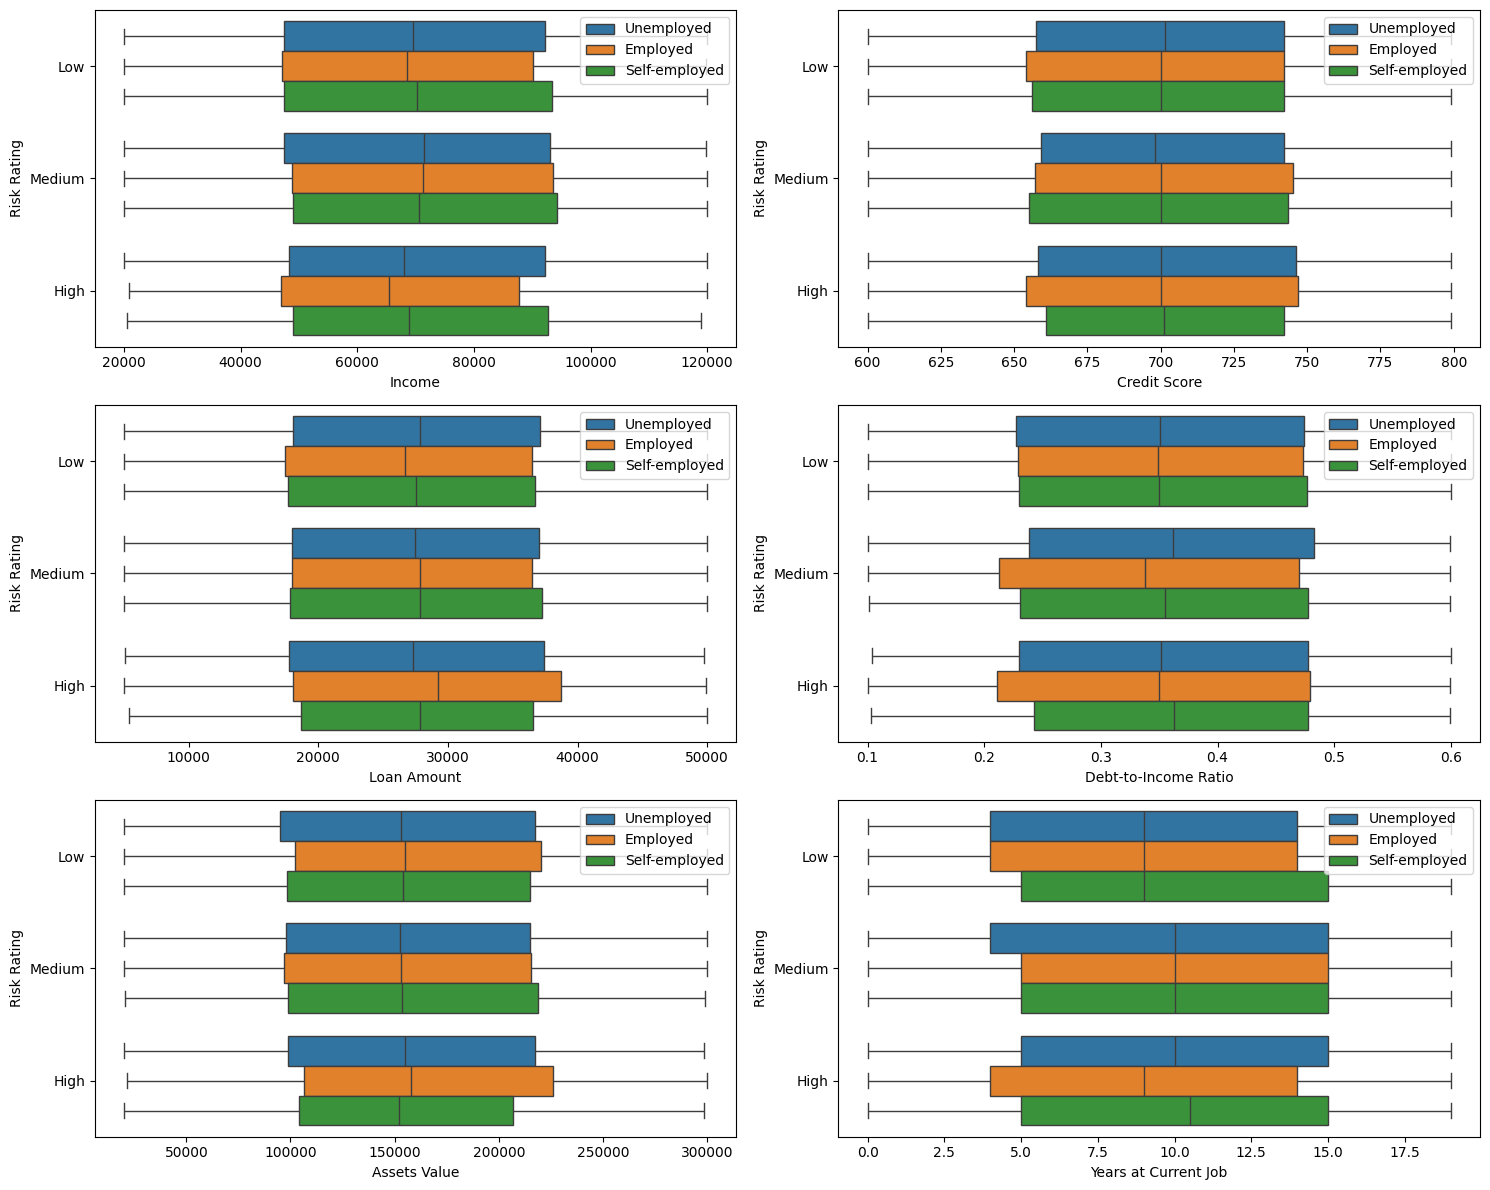

In [22]:
#Criar figura e grade para histogramas
fig, axs = plt.subplots(3, 2, figsize=(15,12))  # 3 linhas, 3 colunas

#Separando nome das colunas:
colunas = ['Income',
       'Credit Score', 'Loan Amount',
       'Debt-to-Income Ratio', 'Assets Value', 'Years at Current Job']

axs = axs.flatten()
for ax, col in zip(axs, colunas):
  sns.boxplot(ax=ax, data=complete_df, x=col, y="Risk Rating", hue='Employment Status')
  ax.legend(loc='upper right')

# Ajuste layout
plt.tight_layout()

# Mostre a figura
plt.show()

**Insights**

1. Os dados não tem muitos pontos outliers; os quartis para cada variável e a distribuição de acordo com o risco estão em faixas semelhantes.
2. Não há muita alteração considerando o vínculo empregatício

### Heat map

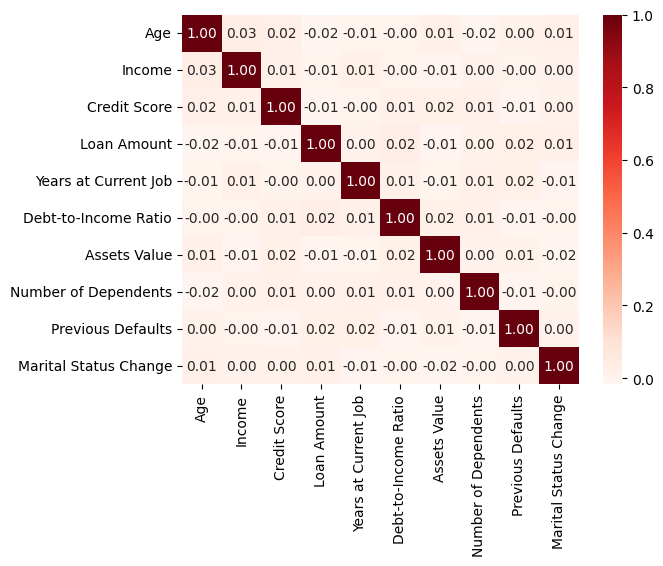

In [23]:
sns.heatmap(imputed_df.corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

**Insights**

1. O gráfico é preenchido por regiões de baixa intensidade, indicando uma boa distribuição dos valores da base de dados.
2. É dificil observar uma tendência ou correlação entre esses dados.

## Aprendizado de máquina

### Divisão entre previsores e classe

**Identificação das colunas:**

1. Categóricas

- Nominal: Gender, Marital Status, Employment Status, Loan Purpose;
- Ordinal: Education Level, Payment History, Risk Rating;

2. Numéricas
- Contínua: Income, Credit Score, Loan Amount, Debt-to-Income Ration, Assets Value
- Discreta: Years at Current Job, Number of Dependents, Previous Defaults, Marital Status Change

**Preditores(Features/Entrada):**
- Categóricos: Gender, Marital Status, Employment Status, Loan Purpose, Education Level, Payment History;
- Numéricos: Years at Current Job, Number of Dependents, Previous Defaults, Marital Status Change, Income, Assets Value

**Classes(Target/Saida):**
- Categóricos: Risk Rating -> Árvore de decisão
- Numéricos:  Credit Score, Loan Amount, Debt-to-Income Ratio -> Regressão

In [24]:
complete_df.columns

Index(['Gender', 'Education Level', 'Marital Status', 'Employment Status',
       'Payment History', 'Loan Purpose', 'Risk Rating', 'Age', 'Income',
       'Credit Score', 'Loan Amount', 'Years at Current Job',
       'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents',
       'Previous Defaults', 'Marital Status Change'],
      dtype='object')

In [25]:
#Separando as colunas de acordo com a classificação
num_feat_df = complete_df[['Years at Current Job', 'Number of Dependents', 'Previous Defaults',
                    'Marital Status Change', 'Income', 'Assets Value']]
cat_feat_df=complete_df[['Gender', 'Education Level', 'Marital Status', 'Employment Status',
       'Payment History', 'Loan Purpose']]

cat_target_df = complete_df['Risk Rating']
num_target_df = complete_df[['Credit Score', 'Loan Amount', 'Debt-to-Income Ratio']]

### Tratamento de atributos categóricos

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_var = OneHotEncoder()

In [27]:
cat_target = cat_var.fit_transform(cat_target_df.values.reshape(-1, 1))
cat_feat = cat_var.fit_transform(cat_feat_df.values).toarray()

In [28]:
cat_feat.shape

(15000, 22)

### Tratamento dos valores numéricos

- Padronização dos dados

In [29]:
from sklearn.preprocessing import StandardScaler
num_var = StandardScaler()

In [30]:
num_feat = num_var.fit_transform(num_feat_df)
num_target = num_var.fit_transform(num_target_df)

In [31]:
num_feat.shape

(15000, 6)

### Divisão em base de treino e de teste

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Concatenar
entrada = np.concatenate([cat_feat, num_feat], axis=1)

In [34]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    entrada, num_target,
    test_size=0.25,
    random_state=123
)

### Validação cruzada entre os métodos

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
# Lista de modelos para testar
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
}

In [37]:
# Avaliar modelos usando validação cruzada
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model,predictors_train, target_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    results[name] = rmse_scores
    print(f"{name} - RMSE Médio: {rmse_scores.mean()} - Desvio Padrão: {rmse_scores.std()}")

Linear Regression - RMSE Médio: 1.0032109299664707 - Desvio Padrão: 0.007468061280015602
Ridge - RMSE Médio: 1.0029902701818352 - Desvio Padrão: 0.007468621664602967
Lasso - RMSE Médio: 1.001491229100274 - Desvio Padrão: 0.007796697032178448
Random Forest - RMSE Médio: 1.0141157423175227 - Desvio Padrão: 0.008302708764499558


In [38]:
# Treinar e avaliar o melhor modelo no conjunto de teste
best_model_name = min(results, key=lambda k: results[k].mean())
best_model = models[best_model_name]
best_model.fit(predictors_train, target_train)
target_test_pred = best_model.predict(predictors_test)

In [39]:
# Calcular métricas
rmse = np.sqrt(mean_squared_error(target_test , target_test_pred ))
mae = mean_absolute_error(target_test , target_test_pred )
r2 = r2_score(target_test , target_test_pred )

print(f"Best Model: {best_model_name}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

Best Model: Lasso
RMSE: 0.9958706220109008
MAE: 0.8459359543670212
R²: -7.27471233996635e-05


#### Validação cruzada para definição do melhor alpha para o método Lasso

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# Definindo os parâmetros para o GridSearchCV
param_grid = {'alpha': np.logspace(-10, 10, 50)}
model = Lasso()

# GridSearchCV com validação cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(predictors_train, target_train)

# Melhor parâmetro alpha encontrado
best_alpha = grid_search.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.384e+02, tolerance: 9.103e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.945e+02, tolerance: 9.090e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.217e+02, tolerance: 9.038e

Melhor valor de alpha: 0.014563484775012445


### Aplicando modelo

In [42]:
model = Lasso (alpha=best_alpha)
model = model.fit(predictors_train, target_train)
model.__dict__

{'alpha': 0.014563484775012445,
 'l1_ratio': 1.0,
 'fit_intercept': True,
 'precompute': False,
 'max_iter': 1000,
 'copy_X': True,
 'tol': 0.0001,
 'warm_start': False,
 'positive': False,
 'random_state': None,
 'selection': 'cyclic',
 'n_features_in_': 28,
 'n_iter_': [1, 2, 1],
 'coef_': array([[-0.       , -0.       ,  0.       , -0.       , -0.       ,
          0.       ,  0.       ,  0.       ,  0.       , -0.       ,
         -0.       ,  0.       , -0.       , -0.       ,  0.       ,
         -0.       , -0.       ,  0.       ,  0.       , -0.       ,
          0.       ,  0.       , -0.       ,  0.       , -0.       ,
          0.       ,  0.       ,  0.       ],
        [-0.       ,  0.       ,  0.       , -0.       , -0.       ,
          0.       ,  0.       , -0.       ,  0.       , -0.       ,
          0.       , -0.       , -0.       ,  0.       , -0.       ,
         -0.       ,  0.       ,  0.       ,  0.       , -0.       ,
         -0.       ,  0.       , -0.     

In [43]:
#Testando o modelo
target_test_predicted = model.predict(predictors_test)
target_train_predicted = model.predict(predictors_train)

In [44]:
#Calcular RMSE
rmse = np.sqrt(mean_squared_error(target_test, target_test_predicted))
print(f'RMSE: {round(rmse, 4)}')

RMSE: 0.9959


### Avaliando o resultado do modelo

In [73]:
complete_df.iloc[0]

,0
Gender,Male
Education Level,PhD
Marital Status,Divorced
Employment Status,Unemployed
Payment History,Poor
Loan Purpose,Business
Risk Rating,Low
Age,49.0
Income,72799.0
Credit Score,688.0


In [74]:
#Dados específicos
dados_esp = {
  'Years at Current Job': 19.0,
  'Number of Dependents': 0.0,
  'Previous Defaults': 2.0,
  'Marital Status Change': 2.0,
  'Income': 72799.0,
  'Assets Value': 120228.0,
  'Gender': 'Male',
  'Education Level': 'PhD',
  'Marital Status': 'Divorced',
  'Employment Status': 'Unemployed',
  'Payment History': 'Poor',
  'Loan Purpose': 'Business'
}

dados_esp = pd.DataFrame([dados_esp])

In [75]:
# Separar variáveis categóricas e numéricas
cat_features = ['Gender', 'Education Level', 'Marital Status', 'Employment Status', 'Payment History', 'Loan Purpose']
num_features = ['Years at Current Job', 'Number of Dependents', 'Previous Defaults', 'Marital Status Change', 'Income', 'Assets Value']

cat_feat_esp = dados_esp[cat_features]
num_feat_esp = dados_esp[num_features]

In [76]:
# Transformar os dados específicos
cat_feat_esp_transformed = cat_var.transform(cat_feat_esp)
num_feat_esp_transformed = num_var.transform(num_feat_esp)

In [84]:
# Concatenar os dados transformados
np.concatenate([num_feat_esp_transformed, cat_feat_esp_transformed], axis=1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 0 dimension(s)

In [ ]:

# Fazer a predição usando o modelo treinado
y_pred_esp = model.predict(X_esp_transformed)

In [ ]:
# Concatenar as features codificadas e escaladas
dados_av = entrada[0].reshape(-1,1)

In [ ]:
#Aplicando o modelo
avaliando_modelo = model.predict(dados_av)
print(avaliando_modelo)

### Árvore de Decisão

In [156]:
import graphviz
from sklearn import tree
from scipy.sparse import issparse
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Dividindo base de treino e teste

In [126]:
if issparse(entrada):
    entrada = entrada.toarray()

if issparse(cat_target):
    cat_target = cat_target.toarray()

In [127]:
predictors_train_cat, predictors_test_cat, target_train_cat, target_test_cat = train_test_split(
    entrada, cat_target,
    test_size=0.25,
    random_state=123
)

Organizando o modelo

In [141]:
#Definindo modelo
model2 = tree.DecisionTreeClassifier(random_state=123)
model2 = model2.fit(predictors_train_cat, target_train_cat)

In [142]:
model2.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 123,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 28,
 'n_outputs_': 1,
 'classes_': array([0, 1, 2]),
 'n_classes_': 3,
 'max_features_': 28,
 'tree_': <sklearn.tree._tree.Tree at 0x7db69e43ec60>}

In [131]:
# Visualizing the decision tree
dot_data = tree.export_graphviz(model2, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

In [145]:
#Fazendo previsões
target_pred_test = model.predict(predictors_test_cat)
target_pred_train = model.predict(predictors_train_cat)

Calculando a matriz confusão

In [152]:
# Convertendo one-hot encoded para single-label targets
target_pred_train_labels = target_pred_train.argmax(axis=1)
target_pred_test_labels = target_pred_test.argmax(axis=1)

In [154]:
#Calculando a matriz confusão
confusion_matrix_train = confusion_matrix(target_train_cat, target_pred_train_labels)
confusion_matrix_test = confusion_matrix(target_test_cat, target_pred_test_labels)

Matriz confusão de treino

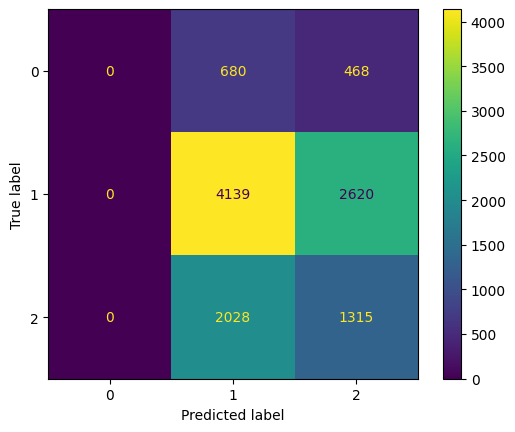

In [157]:
CM_train = confusion_matrix(target_train_cat, target_pred_train_labels, labels=model2.classes_)
CMd_train = ConfusionMatrixDisplay(confusion_matrix=CM_train, display_labels= model2.classes_)
CMd_train.plot()

Matriz confusão de teste

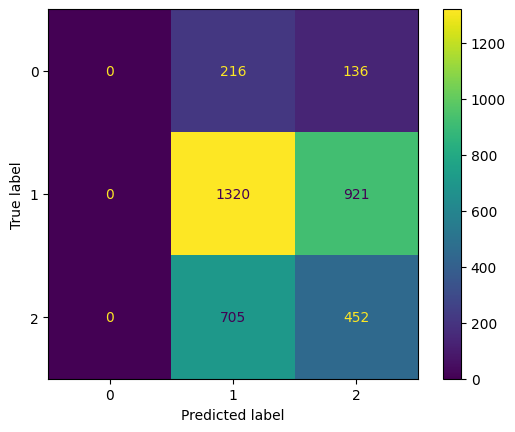

In [162]:
CM_test = confusion_matrix(target_test_cat, target_pred_test_labels, labels=model2.classes_)
CMd_test = ConfusionMatrixDisplay(confusion_matrix=CM_test, display_labels= model2.classes_)
CMd_test.plot()

Acurácia

In [163]:
total_train = confusion_matrix_train.sum()
acertos_train = np.diag(confusion_matrix_train).sum()
acuracia_train = acertos_train / total_train

total_test = confusion_matrix_test.sum()
acertos_test = np.diag(confusion_matrix_test).sum()
acuracia_test = acertos_test / total_test

print(f"Acurácia da base de treino: {round(100 * acuracia_train, 2)}%")
print(f"Acurácia da base de teste: {round(100 * acuracia_test, 2)}%")


Acurácia da base de treino: 48.48%
Acurácia da base de teste: 47.25%
